In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
analytics = pd.read_excel("Analytics.xlsx")

In [4]:
analytics

,Name,State,Total_Visits,num_Discretionary,num_High-Mid-Range,num_Low-Mid-Range,num_Workforce,avg_sqft_Discretionary,avg_sqft_High_Mid-Range,avg_sqft_Low-Mid-Range,...,total_visit_The_Fresh_Market,total_visit_Total_Wine_&_More,total_visit_Trader_Joe's,total_visit_Walmart_Neighborhood_Market,total_visit_Whole_Foods_Market,total_visit_Winn-Dixie,total_visit_ABC_Fine_Wine_&_Spirits,total_visit_Sprouts_Farmers_Market,num_grocery_stores,total_grocery_visit
0,HomeGoods,FL,569734,1,17,2,0,1551.225589,1137.743426,506.064356,...,321886,0,0,0,0,466128,100377,0,9,5826185
1,HomeGoods,FL,522058,0,4,4,0,NaN,1088.269925,1034.945326,...,0,289296,0,0,0,0,48284,0,4,2221548
2,HomeGoods,FL,489856,0,1,3,13,NaN,827.950000,700.441270,...,0,372268,0,495820,0,808450,87545,0,13,6270640
3,HomeGoods,FL,485955,0,5,3,1,NaN,932.311912,917.697691,...,203764,257345,0,797549,0,0,0,0,7,3958385
4,HomeGoods,FL,477152,0,3,11,7,NaN,1022.962115,906.867757,...,314702,240257,0,613942,1112705,106745,0,264749,12,8241103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Marshalls,FL,188704,0,23,18,39,NaN,1023.215747,902.069343,...,498725,0,0,0,475549,751316,0,0,7,3651430
223,Marshalls,FL,175715,0,11,13,20,NaN,954.816729,862.996625,...,311004,0,0,902598,0,0,0,0,9,7577121
224,Marshalls,FL,150855,0,7,6,0,NaN,1240.285455,1192.794466,...,0,0,0,814954,0,490480,103722,480198,9,6021914
225,Marshalls,FL,127309,0,0,3,5,NaN,NaN,883.189845,...,0,0,0,0,0,518239,67242,0,6,2834423


In [29]:
HomeGoods_df = analytics[analytics.Name == "HomeGoods"].reset_index(drop=True)
TJMaxx_df = analytics[analytics.Name == "T.J. Maxx"].reset_index(drop=True)
Marshalls_df = analytics[analytics.Name == "Marshalls"].reset_index(drop=True)

In [17]:
HomeGoods_df.loc[:,'Total_Visits':'total_grocery_visit'].corr()['Total_Visits']

Total_Visits                               1.000000
num_Discretionary                         -0.056807
num_High-Mid-Range                         0.107636
num_Low-Mid-Range                         -0.145903
num_Workforce                             -0.106279
avg_sqft_Discretionary                     0.645775
avg_sqft_High_Mid-Range                    0.171666
avg_sqft_Low-Mid-Range                    -0.214343
avg_sqft_Workforce                        -0.146984
avg_rent_Discretionary                     0.388585
avg_rent_High_Mid-Range                    0.020055
avg_rent_Low-Mid-Range                    -0.022946
avg_rent_Workforce                        -0.161792
Student_Housing                           -0.062531
Affordable_Housing                        -0.102998
Military_Housing                           0.135609
Senior_Housing                            -0.018055
Adaptive_Reuse                            -0.058079
Single_Family_Rental                       0.240596
Fractured_Co

In [18]:
TJMaxx_df.loc[:,'Total_Visits':'total_grocery_visit'].corr()['Total_Visits']

Total_Visits                               1.000000
num_Discretionary                         -0.003758
num_High-Mid-Range                        -0.083560
num_Low-Mid-Range                          0.074174
num_Workforce                              0.017430
avg_sqft_Discretionary                     0.449181
avg_sqft_High_Mid-Range                    0.155075
avg_sqft_Low-Mid-Range                     0.306404
avg_sqft_Workforce                        -0.077512
avg_rent_Discretionary                     0.007276
avg_rent_High_Mid-Range                   -0.089182
avg_rent_Low-Mid-Range                     0.071613
avg_rent_Workforce                        -0.070806
Student_Housing                            0.324332
Affordable_Housing                        -0.071216
Military_Housing                           0.042946
Senior_Housing                            -0.072988
Adaptive_Reuse                            -0.062993
Single_Family_Rental                      -0.050003
Fractured_Co

In [19]:
Marshalls_df.loc[:,'Total_Visits':'total_grocery_visit'].corr()['Total_Visits']

Total_Visits                               1.000000
num_Discretionary                          0.026240
num_High-Mid-Range                        -0.093900
num_Low-Mid-Range                         -0.139508
num_Workforce                             -0.036666
avg_sqft_Discretionary                     0.086236
avg_sqft_High_Mid-Range                    0.298753
avg_sqft_Low-Mid-Range                     0.095201
avg_sqft_Workforce                        -0.086500
avg_rent_Discretionary                    -0.134199
avg_rent_High_Mid-Range                    0.095116
avg_rent_Low-Mid-Range                     0.009430
avg_rent_Workforce                         0.019286
Student_Housing                            0.106119
Affordable_Housing                        -0.090895
Military_Housing                                NaN
Senior_Housing                            -0.093498
Adaptive_Reuse                             0.032011
Single_Family_Rental                      -0.084539
Fractured_Co

In [31]:
def has_store(df):
    stores = ["num_stores_Aldi","num_stores_Publix","num_stores_The_Fresh_Market",
              "num_stores_Total_Wine_&_More","num_stores_Trader_Joe's","num_stores_Walmart_Neighborhood_Market",
              "num_stores_Whole_Foods_Market","num_stores_Winn-Dixie","num_stores_ABC_Fine_Wine_&_Spirits",
              "num_stores_Sprouts_Farmers_Market"]
    for store in stores:
        colname = store.replace("num_stores","has")
        df[colname] = np.where(df[store] >= 1, 1,0)
    return df
#has_store(Marshalls_df).to_csv("Marshalls.csv")


In [47]:
has_store(HomeGoods_df).to_csv("HomeGoods.csv")
has_store(TJMaxx_df).to_csv("TJMaxx.csv")

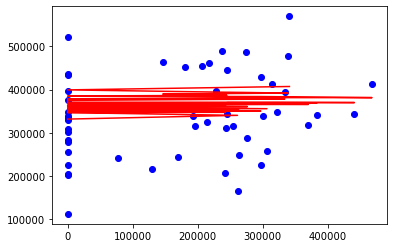

In [46]:
plt.scatter(HomeGoods_df.total_visit_Aldi, HomeGoods_df.Total_Visits,color = "blue")
m,p = np.polyfit(HomeGoods_df.total_visit_Aldi, HomeGoods_df.Total_Visits,1)
plt.plot(HomeGoods_df.total_visit_Aldi, m*HomeGoods_df.Total_Visits+p,color = "red")